
<h4 id="sommaire">Questions</h4>
<ol>
    <li><a href="#1">Charger le jeu de données "taxis" et afficher les 1eres données</a></li>
    <li><a href="#2">Changer les nom des colonnes et afficher</a></li>
    <li><a href="#3">Statistiques descriptives</a></li>
    <li><a href="#4">Vérifier les valeurs manquantes</a></li>
    <li><a href="#5">Distance moyenne parcourue par course</a></li>
    <li><a href="#6">Diagramme à barres de la distribution des passagers par course</a></li>
    <li><a href="#7">Comparaison du tarif moyen par type de paiement</a></li>
    <li><a href="#8">Visualisation de la distribution des distances parcourues</a></li>
    <li><a href="#9">Boîte à moustache des distances parcourues par nombre de passagers</a></li>
    <li><a href="#10">Statistiques des distances par nombre de passagers</a></li>
    <li><a href="#11">Tableau croisé du nombre de passagers et du type de paiement et visualisation</a></li>
    <li><a href="#12">Distribution des pourboires donnés</a></li>
    <li><a href="#13">Boîte à moustache des pourboires en fonction du type de paiement</a></li>
    <li><a href="#14">Diagramme en nuage de points de la distance parcourue en fonction du montant payé</a></li>
    <li><a href="#15">Corrélation entre les variables numériques</a></li>
    <li><a href="#16">Visualisation de la heatmap des corrélations</a></li>
</ol>


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#changer le nom des colonnes
df.rename(columns={'survived': 'survivre', 'pclass': 'Pclass', 'sex': 'sexe', 'age': 'âge', 'sibsp': 'Siblings',
                  'parch': 'Parents/Children', 'fare': 'Tarif', 'embarked': 'Embarqué', 'class': 'Classe',
                  'who': 'Qui', 'adult': 'Adulte', 'deck': 'Pont', 'embark_town': 'Ville d\'embarquement', 'alive': 'Vivant',
                  'alone': 'Seul'}, inplace=True)
df.head()

,survivre,Pclass,sexe,âge,Siblings,Parents/Children,Tarif,Embarqué,Classe,Qui,adult_male,Pont,Ville d'embarquement,Vivant,Seul
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#statistiques descriptives
df.describe()

,survivre,Pclass,âge,Siblings,Parents/Children,Tarif
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#verifier les valeurs manquantes
df.isnull().sum()

survivre                  0
Pclass                    0
sexe                      0
âge                     177
Siblings                  0
Parents/Children          0
Tarif                     0
Embarqué                  2
Classe                    0
Qui                       0
adult_male                0
Pont                    688
Ville d'embarquement      2
Vivant                    0
Seul                      0
dtype: int64

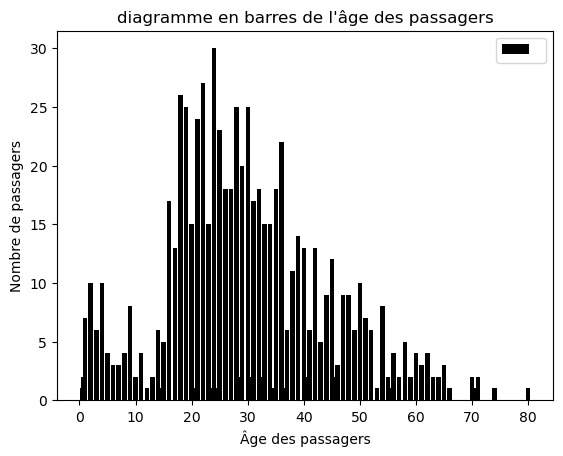

In [7]:
#diagramme en barres de l'age des passagers
age_passagers = df['âge'].value_counts()
age_passagers
x= age_passagers.index
y= age_passagers.values
plt.bar(x, y, color='black')
plt.title('diagramme en barres de l\'âge des passagers')
plt.xlabel('Âge des passagers')
plt.ylabel('Nombre de passagers')
plt.legend([''])
plt.show()

In [8]:
#comparaison de l'age avec la survie
df.groupby("âge")["survivre"].mean()

âge
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: survivre, Length: 88, dtype: float64

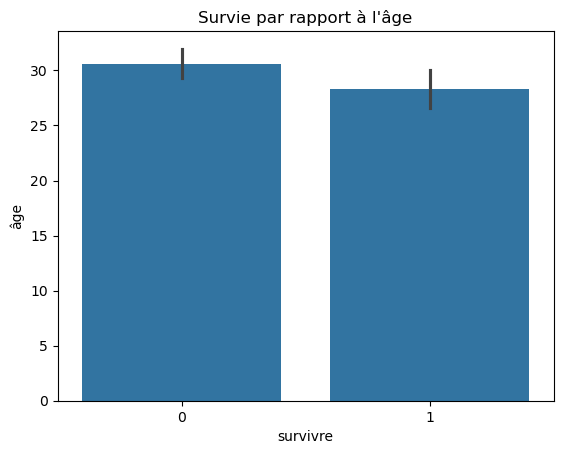

In [9]:
#graphique de la survie par rapport à l'âge
sns.barplot(x='survivre', y='âge', data=df)
plt.title('Survie par rapport à l\'âge')
plt.show()

Text(0.5, 1.0, "Distribution de l'âge avec la survie")

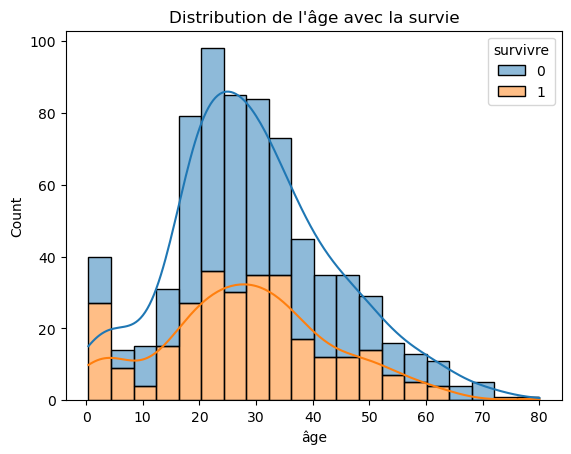

In [10]:
# Avec la courbe de densité (histplot)
sns.histplot(data=df, x='âge', hue='survivre', multiple='stack', kde=True)
plt.title('Distribution de l\'âge avec la survie')

<Axes: xlabel='survivre', ylabel='âge'>

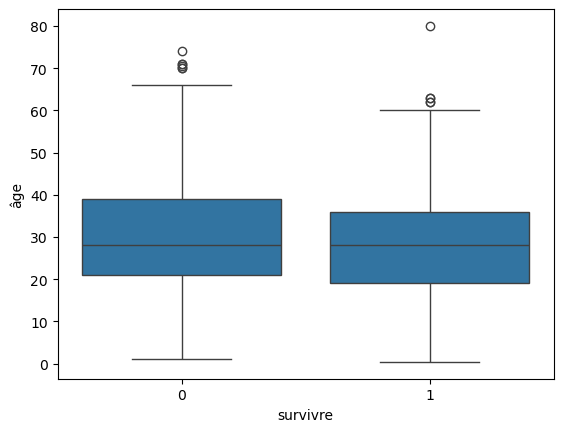

In [11]:
#boite à moustaches de l'âge par rapport à la survie
sns.boxplot(x='survivre', data=df,y='âge')

Text(0.5, 1.0, "Distribution de l'âge avec la survie")

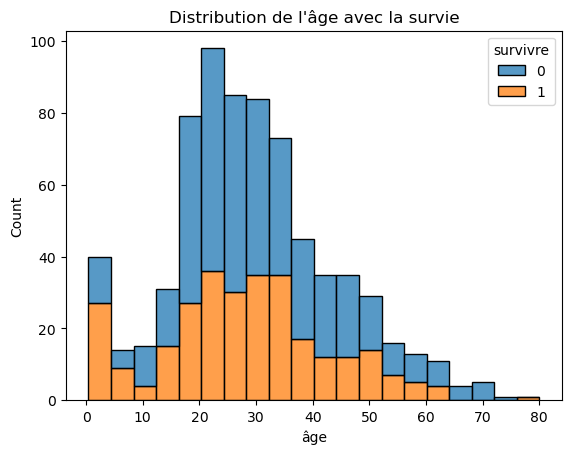

In [12]:
# Avec histplot
sns.histplot(data=df, x='âge', hue='survivre', multiple='stack')
plt.title('Distribution de l\'âge avec la survie')

<Axes: xlabel='âge', ylabel='Tarif'>

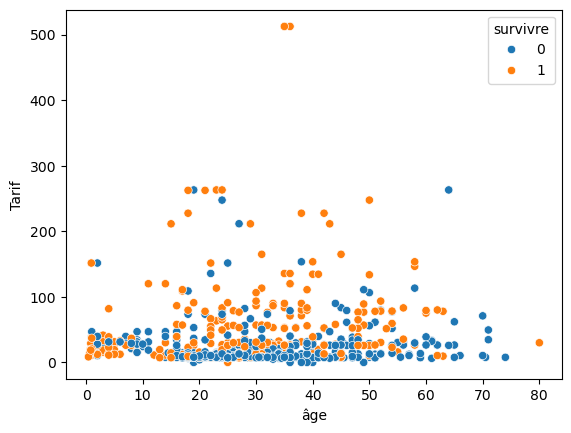

In [13]:
# Scatterplot
sns.scatterplot(data=df, x='âge', y='Tarif', hue='survivre')

In [14]:
#correlation
correlation = df.corr(numeric_only=True)
correlation

,survivre,Pclass,âge,Siblings,Parents/Children,Tarif,adult_male,Seul
survivre,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
âge,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
Siblings,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
Parents/Children,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
Tarif,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
Seul,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<Axes: >

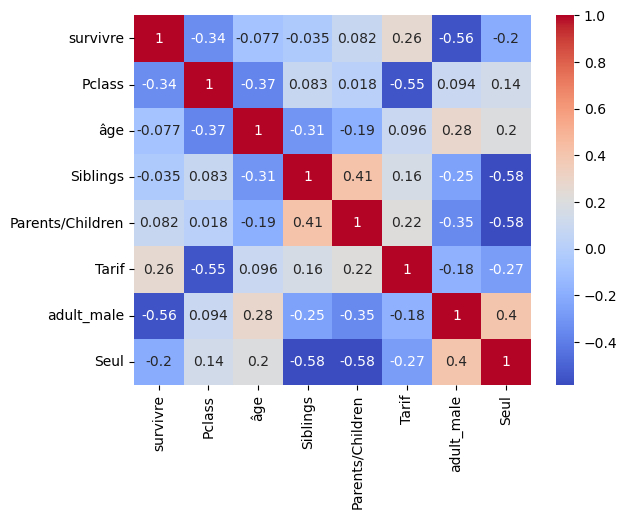

In [15]:
#heatmap de la correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm')
